In [70]:
from scipy.io import loadmat
mnist = loadmat("C:/Users/Arohan/Downloads/WIDS-2K23/Week1/mnist-original")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]


In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

In [72]:
#This block shall be ignored
#from torch.utils.data import Dataset
#from torchvision import datasets
#from torchvision.transforms import ToTensor
#import matplotlib.pyplot as plt


#training_data = datasets.mnist(
 #   root="data",
 #   train=True,
 #   download=True,
 #   transform=ToTensor()
#)

#test_data = datasets.mnist(
 #   root="data",
 #   train=False,
 #   download=True,
 #   transform=ToTensor()
#)

In [73]:
#(X_train, y_train) , (X_test, y_test) = mnist.load_data()
#print(len(mnist))
#print(mnist[1])

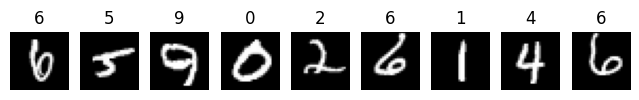

In [140]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
mnist_data_reshaped=mnist_data.reshape((70000,28,28))
for i in range(1, cols * rows + 1):
    #sample_idx = torch.randint(len(training_data), size=(1,)).item()
    j=random.randint(0,70000)
    img, label = mnist_data_reshaped[j], mnist_label[j]
    figure.add_subplot(1, rows*cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()#random images from the MNIST Dataset

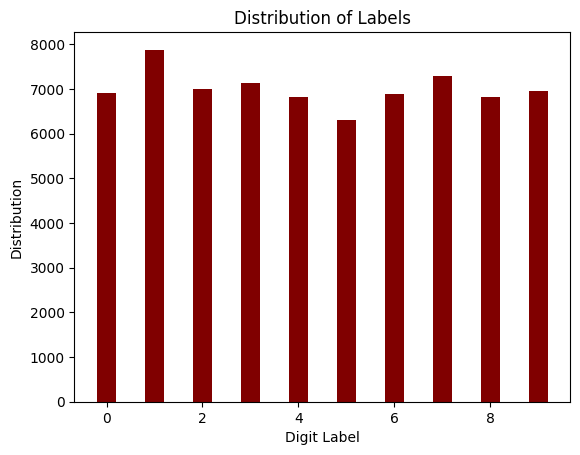

In [75]:
mnist_data_normalized=mnist_data/255
d=mnist_data_normalized.reshape((70000,28,28))
distribution=[0,0,0,0,0,0,0,0,0,0]
for i in range(70000):
    index=int(mnist_label[i])
    distribution[index]=distribution[index]+1
labels=[0,1,2,3,4,5,6,7,8,9]
plt.bar(labels, distribution, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Digit Label")
plt.ylabel("Distribution")
plt.title("Distribution of Labels")
plt.show()

In [76]:
mnist_training_data_reshaped=d[:60000]
mnist_training_label=mnist_label[:60000]
mnist_testing_data_reshaped=d[60000:]
mnist_testing_label=mnist_label[60000:]

In [81]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [82]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(mnist_training_data_reshaped, mnist_training_label, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 191s 101ms/step - loss: 0.1448 - accuracy: 0.9543
Epoch 2/10
1875/1875 [==============================] - 334s 178ms/step - loss: 0.0485 - accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 323s 172ms/step - loss: 0.0348 - accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 320s 171ms/step - loss: 0.0261 - accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 354s 189ms/step - loss: 0.0214 - accuracy: 0.9929
Epoch 6/10
1875/1875 [==============================] - 321s 171ms/step - loss: 0.0169 - accuracy: 0.9946
Epoch 7/10
1875/1875 [==============================] - 324s 173ms/step - loss: 0.0141 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 328s 175ms/step - loss: 0.0117 - accuracy: 0.9966
Epoch 9/10
1875/1875 [==============================] - 328s 175ms/step - loss: 0.0111 - accuracy: 0.9964
Epoch 10/10
1875/1875 [=======================

In [83]:
y_predicted = model.predict(mnist_testing_data_reshaped)
y_predicted[0]

313/313 [==============================] - 33s 85ms/step


array([ 15.036537  ,  -9.087899  , -12.667777  , -15.301033  ,
       -13.757072  ,  -5.657136  ,   7.8753576 ,  -7.9924903 ,
         0.05704614,  -7.937838  ], dtype=float32)

In [97]:
np.argmax(y_predicted[5001])

4

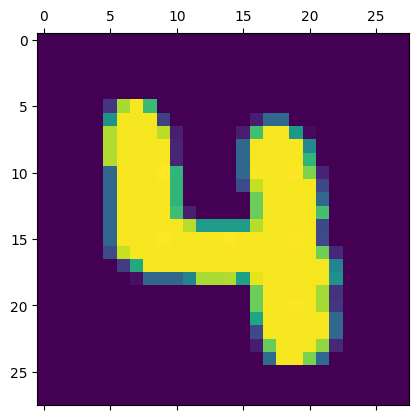

In [98]:
plt.matshow(mnist_testing_data_reshaped[5001])

In [94]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=mnist_testing_label,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    1,    0,    0,    0,    0,    3,    1,    1,    0],
       [   0, 1132,    1,    2,    0,    0,    0,    0,    0,    0],
       [   1,    1, 1022,    0,    0,    0,    0,    6,    1,    1],
       [   0,    0,    1, 1005,    0,    2,    0,    1,    1,    0],
       [   0,    0,    1,    0,  978,    0,    0,    0,    0,    3],
       [   1,    0,    0,    7,    0,  881,    2,    1,    0,    0],
       [   2,    2,    0,    1,    2,    5,  944,    0,    2,    0],
       [   0,    3,    1,    1,    0,    0,    0, 1019,    1,    3],
       [   1,    0,    1,    1,    0,    1,    0,    1,  967,    2],
       [   0,    0,    0,    0,    8,    7,    0,    2,    1,  991]])>

In [167]:
Incorrect_labels=[]
for i in range(len(y_predicted_labels)):
    if(y_predicted_labels[i]!=mnist_testing_label[i]):
        Incorrect_labels.append(i)
        #print(mnist_testing_label[i])
        #figure.add_subplot(len(y_predicted_labels), 1, i)
        #plt.title(labels_map[label])
        #plt.axis("off")
        #plt.imshow(mnist_testing_data_reshaped[i].squeeze(), cmap="gray")
#plt.show()
print(len(Incorrect_labels))

87


Predicted Digit:
5
Actual Digit:
9.0


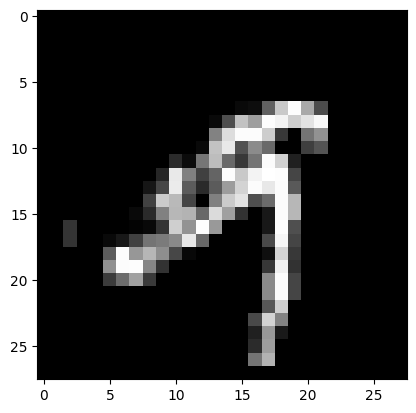

In [151]:
plt.imshow(mnist_testing_data_reshaped[Incorrect_labels[84]].squeeze(), cmap="gray")
print("Predicted Digit:")
print(y_predicted_labels[Incorrect_labels[84]])
print("Actual Digit:")
print(mnist_testing_label[Incorrect_labels[84]])
#mnist

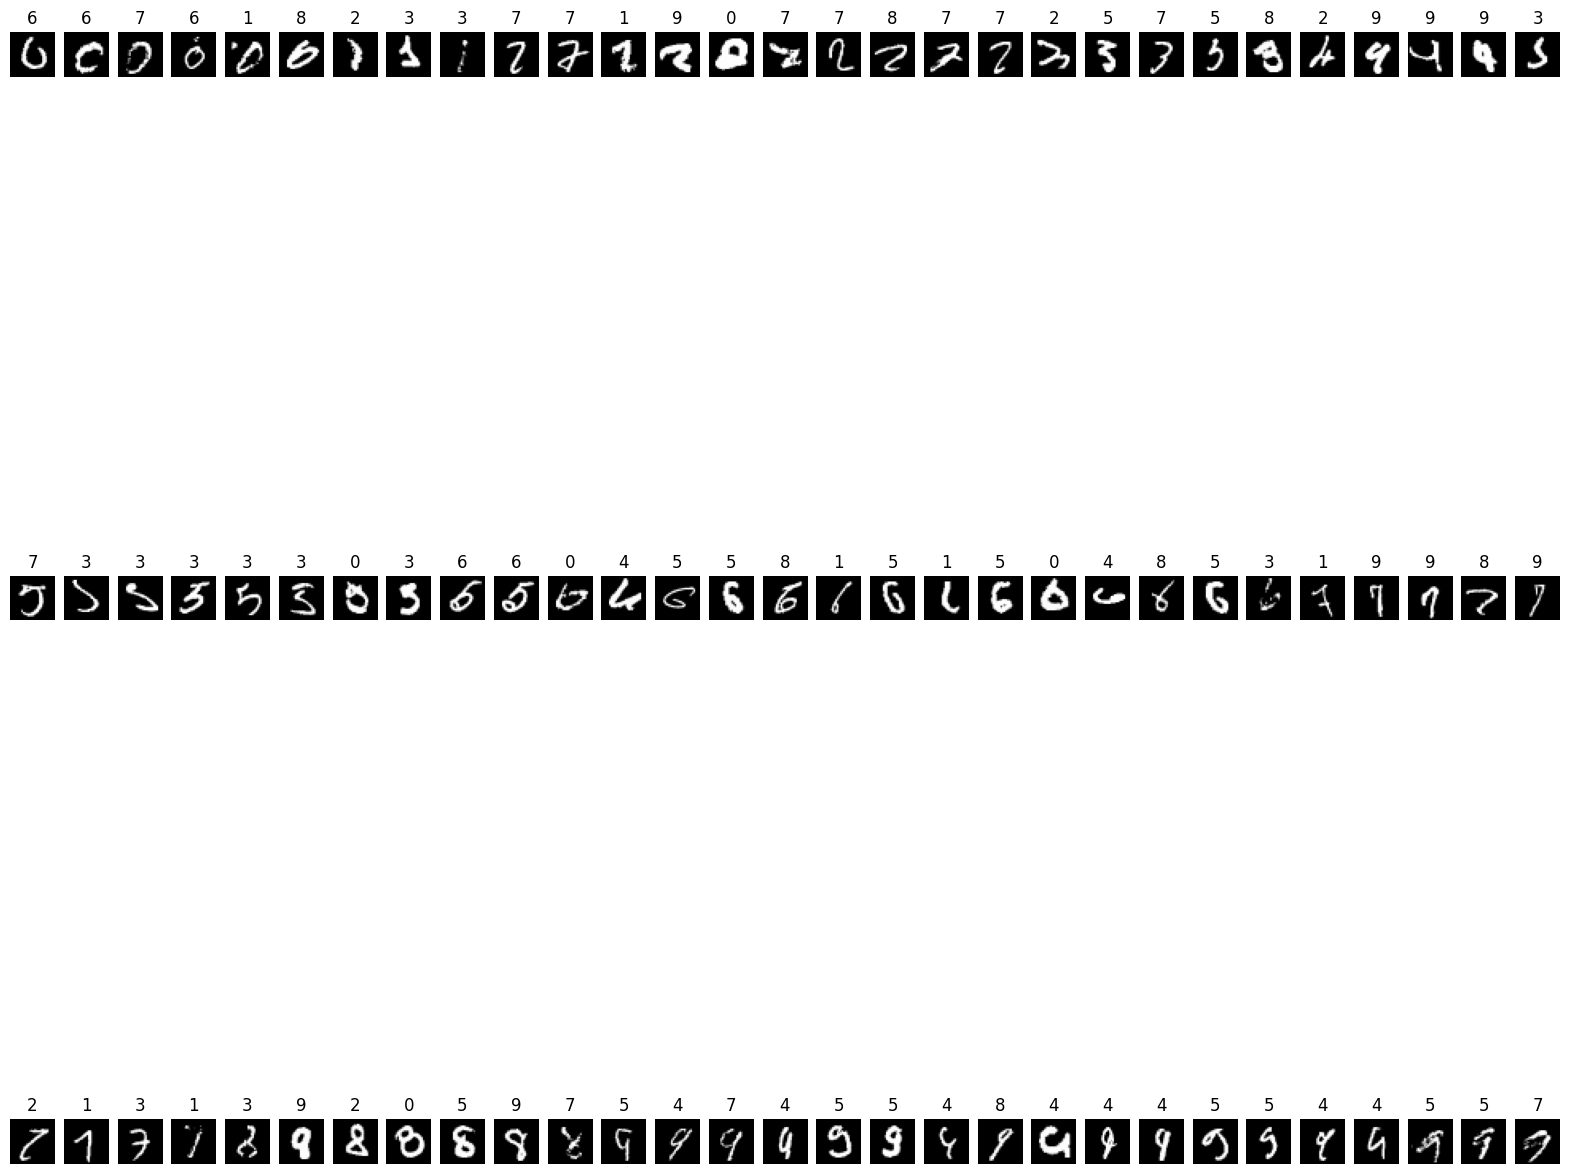

In [166]:
figure = plt.figure(figsize=(20, 20))
for i in range(1,len(Incorrect_labels)+1):
        #print(mnist_testing_label[i])
        figure.add_subplot(3,int(len(Incorrect_labels)/3), i)
        plt.title(y_predicted_labels[Incorrect_labels[i-1]])
        plt.axis("off")
        plt.imshow(mnist_testing_data_reshaped[Incorrect_labels[i-1]].squeeze(), cmap="gray")
plt.show()